In [63]:
# Run last cell first

import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture._gaussian_mixture import (
    _compute_precision_cholesky,
    _estimate_gaussian_parameters,
)
from sklearn.model_selection import ParameterGrid
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from joblib import Parallel, delayed
import warnings

from graspologic.cluster.base import BaseCluster

import matplotlib.pyplot as plt

%matplotlib inline

#Data Generation

pi = np.array([1/3,1/3,1/3])

mu0 = np.array([0,0,0])

mu1 = np.array([5,0,0])

mu2 = np.array([0,5,0])

mu = np.vstack((mu0,mu1,mu2))

sigma = np.identity(3)

n_obs_cluster = np.random.default_rng().multinomial(n = 100, pvals = pi)

data = []

for i in range(len(n_obs_cluster)):
    cluster = np.random.default_rng().multivariate_normal(mu[i], sigma, n_obs_cluster[i])
    data.append(cluster)

data = np.vstack((data[0],data[1],data[2]))


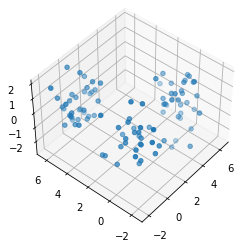

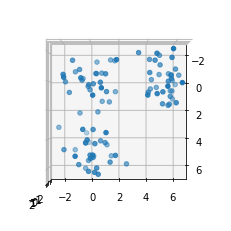

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter3D(data[:,0], data[:,1], data[:,2]);

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(45, 220)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')


ax2.scatter3D(data[:,0], data[:,1], data[:,2]);

# rotate the axes and update
for angle in range(0, 360):
   ax2.view_init(90, 0)

In [65]:
from graspologic.cluster import GaussianCluster, AutoGMMCluster

gc = GaussianCluster(min_components=2, max_components= 3, n_init=2, covariance_type='all' )
agc = AutoGMMCluster(min_components=2, max_components= 3, covariance_type='all')
agc1 = AutoGMMCluster1(min_components=2, max_components= 3, covariance_type='all', n_init = 2, tol = 1e-3)


test = gc.fit(data)
test_a = agc.fit(data)
test_a1 = agc1.fit(data)


In [66]:
test_a.results_

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,ward,spherical,0.0
1,"GaussianMixture(covariance_type='spherical',\n...",1110.356981,NaN,3,euclidean,ward,spherical,0.0
2,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,complete,spherical,0.0
3,"GaussianMixture(covariance_type='spherical',\n...",1110.356981,NaN,3,euclidean,complete,spherical,0.0
4,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,average,spherical,0.0
...,...,...,...,...,...,...,...,...
83,"GaussianMixture(covariance_type='diag', n_comp...",1130.952674,NaN,3,none,ward,diag,0.0
84,"GaussianMixture(covariance_type='tied', n_comp...",1175.402162,NaN,2,none,ward,tied,0.0
85,"GaussianMixture(covariance_type='tied', n_comp...",1121.867809,NaN,3,none,ward,tied,0.0
86,"GaussianMixture(n_components=2, reg_covar=0)",1181.391621,NaN,2,none,ward,full,0.0


In [67]:
test_a1.results_

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,ward,spherical,0.000000
1,"GaussianMixture(covariance_type='spherical',\n...",1110.356981,NaN,3,euclidean,ward,spherical,0.000000
2,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,complete,spherical,0.000000
3,"GaussianMixture(covariance_type='spherical',\n...",1110.356981,NaN,3,euclidean,complete,spherical,0.000000
4,"GaussianMixture(covariance_type='spherical',\n...",1212.880332,NaN,2,euclidean,average,spherical,0.000000
...,...,...,...,...,...,...,...,...
91,"GaussianMixture(covariance_type='diag', n_comp...",1130.952674,NaN,3,none,none,diag,0.000001
92,"GaussianMixture(covariance_type='tied', n_comp...",1175.402162,NaN,2,none,none,tied,0.000001
93,"GaussianMixture(covariance_type='tied', n_comp...",1121.867809,NaN,3,none,none,tied,0.000001
94,"GaussianMixture(n_components=2, n_init=2)",1167.817270,NaN,2,none,none,full,0.000001


In [68]:
min_components=2
max_components=3
covariance_type="all"
#covariance_type="tied"
tol=1e-3
reg_covar=1e-6
max_iter=100
n_init=2
init_params="kmeans"
random_state=None

covariance_type = ["spherical", "diag", "tied", "full"]
#covariance_type = ["tied"]

lower_ncomponents = min_components
upper_ncomponents = max_components

n_mixture_components = upper_ncomponents - lower_ncomponents + 1

param_grid = dict(
    covariance_type=covariance_type,
    n_components=range(lower_ncomponents, upper_ncomponents + 1),
    tol=[tol],
    reg_covar=[reg_covar],
    max_iter=[max_iter],
    n_init=[n_init],
    init_params=[init_params],
    random_state=[random_state],
)

param_grid = list(ParameterGrid(param_grid))

from sklearn.mixture import GaussianMixture
import pandas as pd 
y = None

new_results = [dict([]) for _ in range(n_mixture_components*len(covariance_type))]

#models = [[] for _ in range(n_mixture_components)]
#bics = [[] for _ in range(n_mixture_components)]
#aris = [[] for _ in range(n_mixture_components)]

for i, params in enumerate(param_grid):
    model = GaussianMixture(**params)
    model.fit(data)
    #models[i % n_mixture_components].append(model)
    #bics[i % n_mixture_components].append(model.bic(data))
    #models[i].append(model)
    #bics[i].append(model.bic(data))
    new_results[i]["model"] = model
    new_results[i]["bic/aic"] = model.bic(data)
    #bics[i % n_mixture_components].append(model.bic(X))
    if y is not None:
        predictions = model.predict(data)
        #aris[i % n_mixture_components].append(
        #    adjusted_rand_score(y, predictions)
        #)
        new_results[i]["ari"] = adjusted_rand_score(y, predictions)
    new_results[i]["n_components"] = params["n_components"]
    new_results[i]["affinity"] = "none"
    new_results[i]["linkage"] = "none"
    new_results[i]["covariance_type"] = params["covariance_type"]
    new_results[i]["reg_covar"] = params["reg_covar"]

results = pd.DataFrame(new_results)

results

,model,bic/aic,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical', n...",1212.880330,2,none,none,spherical,0.000001
1,"GaussianMixture(covariance_type='spherical', n...",1110.358026,3,none,none,spherical,0.000001
2,"GaussianMixture(covariance_type='diag', n_comp...",1143.637609,2,none,none,diag,0.000001
3,"GaussianMixture(covariance_type='diag', n_comp...",1130.952674,3,none,none,diag,0.000001
4,"GaussianMixture(covariance_type='tied', n_comp...",1175.402162,2,none,none,tied,0.000001
5,"GaussianMixture(covariance_type='tied', n_comp...",1121.867809,3,none,none,tied,0.000001
6,"GaussianMixture(n_components=2, n_init=2)",1167.817270,2,none,none,full,0.000001
7,"GaussianMixture(n_components=3, n_init=2)",1165.453018,3,none,none,full,0.000001


In [69]:
test_a1.results_.iloc[88:96]

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
88,"GaussianMixture(covariance_type='spherical', n...",1212.880330,NaN,2,none,none,spherical,0.000001
89,"GaussianMixture(covariance_type='spherical', n...",1110.358026,NaN,3,none,none,spherical,0.000001
90,"GaussianMixture(covariance_type='diag', n_comp...",1143.637609,NaN,2,none,none,diag,0.000001
91,"GaussianMixture(covariance_type='diag', n_comp...",1130.952674,NaN,3,none,none,diag,0.000001
92,"GaussianMixture(covariance_type='tied', n_comp...",1175.402162,NaN,2,none,none,tied,0.000001
93,"GaussianMixture(covariance_type='tied', n_comp...",1121.867809,NaN,3,none,none,tied,0.000001
94,"GaussianMixture(n_components=2, n_init=2)",1167.817270,NaN,2,none,none,full,0.000001
95,"GaussianMixture(n_components=3, n_init=2)",1165.453018,NaN,3,none,none,full,0.000001


In [47]:
# Copyright (c) Microsoft Corporation and contributors.
# Licensed under the MIT License.

import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture._gaussian_mixture import (
    _compute_precision_cholesky,
    _estimate_gaussian_parameters,
)
from sklearn.model_selection import ParameterGrid
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from joblib import Parallel, delayed
import warnings

from graspologic.cluster.base import BaseCluster


class AutoGMMCluster1(BaseCluster):
    """
    Automatic Gaussian Mixture Model (GMM) selection.

    Clustering algorithm using a hierarchical agglomerative clustering then Gaussian
    mixtured model (GMM) fitting. Different combinations of agglomeration, GMM, and
    cluster numbers are used and the clustering with the best selection
    criterion (bic/aic) is chosen.

    Parameters
    ----------
    min_components : int, default=2.
        The minimum number of mixture components to consider (unless
        max_components=None, in which case this is the maximum number of
        components to consider). If max_components is not None, min_components
        must be less than or equal to max_components.
        If label_init is given, min_components must match number of unique labels
        in label_init.

    max_components : int or None, default=10.
        The maximum number of mixture components to consider. Must be greater
        than or equal to min_components.
        If label_init is given, min_components must match number of unique labels
        in label_init.

    affinity : {'euclidean','manhattan','cosine','none', 'all' (default)}, optional
        String or list/array describing the type of affinities to use in agglomeration.
        If a string, it must be one of:

        - 'euclidean'
            L2 norm
        - 'manhattan'
            L1 norm
        - 'cosine'
            cosine similarity
        - 'none'
            no agglomeration - GMM is initialized with k-means
        - 'all'
            considers all affinities in ['euclidean','manhattan','cosine','none']

        If a list/array, it must be a list/array of strings containing only
        'euclidean', 'manhattan', 'cosine', and/or 'none'.

        Note that cosine similarity can only work when all of the rows are not the zero vector.
        If the input matrix has a zero row, cosine similarity will be skipped and a warning will
        be thrown.

    linkage : {'ward','complete','average','single', 'all' (default)}, optional
        String or list/array describing the type of linkages to use in agglomeration.
        If a string, it must be one of:

        - 'ward'
            ward's clustering, can only be used with euclidean affinity
        - 'complete'
            complete linkage
        - 'average'
            average linkage
        - 'single'
            single linkage
        - 'all'
            considers all linkages in ['ward','complete','average','single']

        If a list/array, it must be a list/array of strings containing only
        'ward', 'complete', 'average', and/or 'single'.

    covariance_type : {'full', 'tied', 'diag', 'spherical', 'all' (default)} , optional
        String or list/array describing the type of covariance parameters to use.
        If a string, it must be one of:

        - 'full'
            each component has its own general covariance matrix
        - 'tied'
            all components share the same general covariance matrix
        - 'diag'
            each component has its own diagonal covariance matrix
        - 'spherical'
            each component has its own single variance
        - 'all'
            considers all covariance structures in ['spherical', 'diag', 'tied', 'full']

        If a list/array, it must be a list/array of strings containing only
        'spherical', 'tied', 'diag', and/or 'spherical'.

    random_state : int, RandomState instance or None, optional (default=None)
        There is randomness in k-means initialization of
        :class:`sklearn.mixture.GaussianMixture`. This parameter is passed to
        :class:`~sklearn.mixture.GaussianMixture` to control the random state.
        If int, random_state is used as the random number generator seed;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by ``np.random``.

    label_init : array-like, shape (n_samples,), optional (default=None)
        List of labels for samples if available. Used to initialize the model.
        If provided, min_components and max_components must match the number of
        unique labels given here.

    max_iter : int, optional (default = 100).
        The maximum number of EM iterations to perform.

    selection_criteria : str {"bic" or "aic"}, optional, (default="bic")
        select the best model based on Bayesian Information Criterion (bic) or
        Aikake Information Criterion (aic)

    verbose : int, optional (default = 0)
        Enable verbose output. If 1 then it prints the current initialization and each
        iteration step. If greater than 1 then it prints also the log probability and
        the time needed for each step.

    max_agglom_size : int or None, optional (default = 2000)
        The maximum number of datapoints on which to do agglomerative clustering as the
        initialization to GMM. If the number of datapoints is larger than this value,
        a random subset of the data is used for agglomerative initialization. If None,
        all data is used for agglomerative clustering for initialization.

    n_jobs : int or None, optional (default = None)
        The number of jobs to use for the computation. This works by computing each of
        the initialization runs in parallel. None means 1 unless in a
        ``joblib.parallel_backend context``. -1 means using all processors.
        See https://scikit-learn.org/stable/glossary.html#term-n-jobs for more details.

    Attributes
    ----------
    results_ : pandas.DataFrame
        Contains exhaustive information about all the clustering runs.
        Columns are:

        'model' : GaussianMixture object
            GMM clustering fit to the data
        'bic/aic' : float
            Bayesian Information Criterion
        'ari' : float or nan
            Adjusted Rand Index between GMM classification, and true classification,
            nan if y is not given
        'n_components' : int
            number of clusters
        'affinity' : {'euclidean','manhattan','cosine','none'}
            affinity used in Agglomerative Clustering
        'linkage' : {'ward','complete','average','single'}
            linkage used in Agglomerative Clustering
        'covariance_type' : {'full', 'tied', 'diag', 'spherical'}
            covariance type used in GMM
        'reg_covar' : float
            regularization used in GMM

    criter_ : the best (lowest) Bayesian Information Criterion

    n_components_ : int
        number of clusters in the model with the best bic/aic

    covariance_type_ : str
        covariance type in the model with the best bic/aic

    affinity_ : str
        affinity used in the model with the best bic/aic

    linkage_ : str
        linkage used in the model with the best bic/aic

    reg_covar_ : float
        regularization used in the model with the best bic/aic

    ari_ : float
        ARI from the model with the best bic/aic, nan if no y is given

    model_ : :class:`sklearn.mixture.GaussianMixture`
        object with the best bic/aic

    See Also
    --------
    graspologic.cluster.GaussianCluster
    graspologic.cluster.KMeansCluster

    Notes
    -----
    This algorithm was strongly inspired by mclust, a clustering package in R

    References
    ----------
    .. [1] Jeffrey D. Banfield and Adrian E. Raftery. Model-based gaussian and
       non-gaussian clustering. Biometrics, 49:803–821, 1993.

    .. [2] Abhijit Dasgupta and Adrian E. Raftery. Detecting features in spatial point
       processes with clutter via model-based clustering. Journal of the American
       Statistical Association, 93(441):294–302, 1998.
    """

    def __init__(
        self,
        min_components=2,
        max_components=10,
        n_init = None,
        tol = None,
        reg_covar = 1e-6, #this may cause error with rest of the code
        affinity="all",
        linkage="all",
        covariance_type="all",
        random_state=None,
        label_init=None,
        max_iter=100,
        verbose=0,
        selection_criteria="bic",
        max_agglom_size=2000,
        n_jobs=None,
    ):
        if isinstance(min_components, int):
            if min_components <= 0:
                msg = "min_components must be >= 1."
                raise ValueError(msg)
        else:
            msg = "min_components must be an integer, not {}.".format(
                type(min_components)
            )
            raise TypeError(msg)

        if isinstance(max_components, int):
            if max_components <= 0:
                msg = "max_components must be >= 1 or None."
                raise ValueError(msg)
            elif min_components > max_components:
                msg = "min_components must be less than or equal to max_components."
                raise ValueError(msg)
        elif max_components is not None:
            msg = "max_components must be an integer or None, not {}.".format(
                type(max_components)
            )
            raise TypeError(msg)

        if isinstance(affinity, (np.ndarray, list)):
            affinity = np.unique(affinity)
        elif isinstance(affinity, str):
            if affinity == "all":
                affinity = ["euclidean", "manhattan", "cosine", "none"]
            else:
                affinity = [affinity]
        else:
            msg = "affinity must be a numpy array, a list, or "
            msg += "string, not {}".format(type(affinity))
            raise TypeError(msg)

        for aff in affinity:
            if aff not in ["euclidean", "manhattan", "cosine", "none"]:
                msg = (
                    "affinity must be one of "
                    + '["euclidean","manhattan","cosine","none"]'
                )
                msg += " not {}".format(aff)
                raise ValueError(msg)

        if ("ward" in linkage) and not ("euclidean" in affinity):
            msg = (
                'if "ward" is a linkage option, '
                + '"euclidean" must be an affinity option'
            )
            raise ValueError(msg)

        if isinstance(linkage, (np.ndarray, list)):
            linkage = np.unique(linkage)
        elif isinstance(linkage, str):
            if linkage == "all":
                linkage = ["ward", "complete", "average", "single"]
            else:
                linkage = [linkage]
        else:
            msg = "linkage must be a numpy array, a list, or "
            msg += "string, not {}".format(type(linkage))
            raise TypeError(msg)

        for link in linkage:
            if link not in ["ward", "complete", "average", "single"]:
                msg = (
                    "linkage must be one of "
                    + '["ward", "complete", "average", "single"]'
                )
                msg += " not {}".format(link)
                raise ValueError(msg)

        if isinstance(covariance_type, (np.ndarray, list)):
            covariance_type = np.unique(covariance_type)
        elif isinstance(covariance_type, str):
            if covariance_type == "all":
                covariance_type = ["spherical", "diag", "tied", "full"]
            else:
                covariance_type = [covariance_type]
        else:
            msg = "covariance_type must be a numpy array, a list, or "
            msg += "string, not {}".format(type(covariance_type))
            raise TypeError(msg)

        for cov in covariance_type:
            if cov not in ["spherical", "diag", "tied", "full"]:
                msg = (
                    "covariance structure must be one of "
                    + '["spherical", "diag", "tied", "full"]'
                )
                msg += " not {}".format(cov)
                raise ValueError(msg)

        new_covariance_type = []
        for cov in ["spherical", "diag", "tied", "full"]:
            if cov in covariance_type:
                new_covariance_type.append(cov)

        if isinstance(label_init, list):
            label_init = np.array(label_init)
        elif isinstance(label_init, np.ndarray):
            if label_init.ndim > 2 or (
                label_init.ndim == 2 and 1 not in label_init.shape
            ):
                msg = "label_init must be a one dimension array."
                raise TypeError(msg)
        elif label_init is not None:
            msg = "label_init must be a 1-D numpy array, a list, or None,"
            msg += "not {}".format(type(label_init))
            raise TypeError(msg)

        if selection_criteria not in ["aic", "bic"]:
            msg = "selection_criteria must be one of " + '["aic, "bic"]'
            msg += " not {}".format(selection_criteria)
            raise ValueError(msg)

        # Adjust elements in label_init to range(n_components of label_init)
        if label_init is not None:
            uni_label_init = np.unique(label_init)
            n_components_init = np.size(uni_label_init)

            if (
                min_components != n_components_init
                or max_components != n_components_init
            ):
                msg = "min_components and max_components must equal "
                msg += " the number of init labels: {}".format(n_components_init)
                raise ValueError(msg)

            labels_init = np.copy(label_init)
            for i in range(n_components_init):
                labels_init[np.argwhere(label_init == uni_label_init[i])] = i
            labels_init = labels_init.astype(int)
        else:
            labels_init = None

        if not isinstance(max_agglom_size, int) and max_agglom_size is not None:
            raise TypeError("`max_agglom_size` must be an int or None")
        if max_agglom_size is not None and max_agglom_size < 2:
            raise ValueError("Must use at least 2 points for `max_agglom_size`")

        self.min_components = min_components
        self.max_components = max_components
        self.affinity = affinity
        self.linkage = linkage
        self.covariance_type = new_covariance_type
        self.random_state = random_state
        self.label_init = labels_init
        self.max_iter = max_iter
        self.verbose = verbose
        self.selection_criteria = selection_criteria
        self.max_agglom_size = max_agglom_size
        self.n_jobs = n_jobs
        self.n_init = n_init
        self.tol = tol
        self.reg_covar = reg_covar

    # ignoring warning here because if convergence is not reached, the regularization
    # is automatically increased
    @ignore_warnings(category=ConvergenceWarning)
    def _fit_cluster(self, X, y, params):
        label_init = self.label_init
        if label_init is not None:
            onehot = _labels_to_onehot(label_init)
            weights_init, means_init, precisions_init = _onehot_to_initial_params(
                X, onehot, params[1]["covariance_type"]
            )
            gm_params = params[1]
            gm_params["weights_init"] = weights_init
            gm_params["means_init"] = means_init
            gm_params["precisions_init"] = precisions_init
        elif params[0]["affinity"] != "none":
            agg = AgglomerativeClustering(**params[0])
            n = X.shape[0]

            if self.max_agglom_size is None or n <= self.max_agglom_size:
                X_subset = X
            else:  # if dataset is huge, agglomerate a subset
                subset_idxs = np.random.choice(np.arange(0, n), self.max_agglom_size)
                X_subset = X[subset_idxs, :]
            agg_clustering = agg.fit_predict(X_subset)
            onehot = _labels_to_onehot(agg_clustering)
            weights_init, means_init, precisions_init = _onehot_to_initial_params(
                X_subset, onehot, params[1]["covariance_type"]
            )
            gm_params = params[1]
            gm_params["weights_init"] = weights_init
            gm_params["means_init"] = means_init
            gm_params["precisions_init"] = precisions_init
        else:
            gm_params = params[1]
            gm_params["init_params"] = "kmeans"
        gm_params["reg_covar"] = 0
        gm_params["max_iter"] = self.max_iter

        criter = np.inf  # if none of the iterations converge, bic/aic is set to inf
        # below is the regularization scheme
        while gm_params["reg_covar"] <= 1 and criter == np.inf:
            model = GaussianMixture(**gm_params)
            try:
                model.fit(X)
                predictions = model.predict(X)
                counts = [
                    sum(predictions == i) for i in range(gm_params["n_components"])
                ]
                # singleton clusters not allowed
                assert not any([count <= 1 for count in counts])

            except ValueError:
                gm_params["reg_covar"] = _increase_reg(gm_params["reg_covar"])
                continue
            except AssertionError:
                gm_params["reg_covar"] = _increase_reg(gm_params["reg_covar"])
                continue
            # if the code gets here, then the model has been fit with no errors or
            # singleton clusters
            if self.selection_criteria == "bic":
                criter = model.bic(X)
            else:
                criter = model.aic(X)
            break

        if y is not None:
            self.predictions = model.predict(X)
            ari = adjusted_rand_score(y, self.predictions)
        else:
            ari = float("nan")
        results = {
            "model": model,
            "bic/aic": criter,
            "ari": ari,
            "n_components": gm_params["n_components"],
            "affinity": params[0]["affinity"],
            "linkage": params[0]["linkage"],
            "covariance_type": gm_params["covariance_type"],
            "reg_covar": gm_params["reg_covar"],
        }
        return results

    def fit(self, X, y=None):
        """
        Fits gaussian mixture model to the data.
        Initialize with agglomerative clustering then
        estimate model parameters with EM algorithm.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            List of n_features-dimensional data points. Each row
            corresponds to a single data point.

        y : array-like, shape (n_samples,), optional (default=None)
            List of labels for X if available. Used to compute
            ARI scores.

        Returns
        -------
        self : object
            Returns an instance of self.
        """

        # Deal with number of clusters
        if self.max_components is None:
            lower_ncomponents = 1
            upper_ncomponents = self.min_components
        else:
            lower_ncomponents = self.min_components
            upper_ncomponents = self.max_components

        if upper_ncomponents > X.shape[0]:
            if self.max_components is None:
                msg = "if max_components is None then min_components must be >= "
                msg += "n_samples, but min_components = {}, n_samples = {}".format(
                    upper_ncomponents, X.shape[0]
                )
            else:
                msg = "max_components must be <= n_samples, but max_components = "
                msg += "{}, n_samples = {}".format(upper_ncomponents, X.shape[0])
            raise ValueError(msg)
        elif lower_ncomponents > X.shape[0]:
            msg = "min_components must be <= n_samples, but min_components = "
            msg += "{}, n_samples = {}".format(upper_ncomponents, X.shape[0])
            raise ValueError(msg)
        # check if X contains the 0 vector
        if np.any(~X.any(axis=1)) and ("cosine" in self.affinity):
            if isinstance(self.affinity, np.ndarray):
                self.affinity = np.delete(
                    self.affinity, np.argwhere(self.affinity == "cosine")
                )
            if isinstance(self.affinity, list):
                self.affinity.remove("cosine")
            warnings.warn("X contains a zero vector, will not run cosine affinity.")

        label_init = self.label_init
        if label_init is not None:
            if label_init.size != X.shape[0]:
                msg = "n_samples must be the same as the length of label_init"
                raise ValueError(msg)

        param_grid = dict(
            affinity=self.affinity,
            linkage=self.linkage,
            covariance_type=self.covariance_type,
            n_components=range(lower_ncomponents, upper_ncomponents + 1),
            random_state=[self.random_state],
        )

        param_grid = list(ParameterGrid(param_grid))
        param_grid = _process_paramgrid(param_grid)

        def _fit_for_data(p):
            return self._fit_cluster(X, y, p)

        results = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
            delayed(_fit_for_data)(p) for p in param_grid
        )

        #print(type(results))
        #print(type(results[1]))
        #print(results[1].keys())

        #start of modification

        if ((self.n_init is not None) and (self.tol is not None)):

            random_state = self.random_state

            n_mixture_components = upper_ncomponents - lower_ncomponents + 1

            param_grid = dict(
                covariance_type=self.covariance_type,
                n_components=range(lower_ncomponents, upper_ncomponents + 1),
                tol=[self.tol],
                reg_covar=[self.reg_covar],
                max_iter=[self.max_iter],
                n_init=[self.n_init],
                #init_params=[self.init_params],
                init_params = ["kmeans"],
                random_state=[random_state],
            )

            param_grid = list(ParameterGrid(param_grid))

            new_results = [dict([]) for _ in range(n_mixture_components*len(self.covariance_type))]

            for i, params in enumerate(param_grid):
                model = GaussianMixture(**params)
                model.fit(X)
                #models[i % n_mixture_components].append(model)
                new_results[i]["model"] = model
                new_results[i]["bic/aic"] = model.bic(X)
                #bics[i % n_mixture_components].append(model.bic(X))
                if y is not None:
                    predictions = model.predict(X)
                    #aris[i % n_mixture_components].append(
                    #    adjusted_rand_score(y, predictions)
                    #)
                    new_results[i]["ari"] = adjusted_rand_score(y, predictions)
                new_results[i]["n_components"] = params["n_components"]
                new_results[i]["affinity"] = "none"
                new_results[i]["linkage"] = "none"
                new_results[i]["covariance_type"] = params["covariance_type"]
                new_results[i]["reg_covar"] = params["reg_covar"]
                    

            results = results + new_results
        #end of modification


        results = pd.DataFrame(results)

        self.results_ = results
        # Get the best cov type and its index within the dataframe
        best_idx = results["bic/aic"].idxmin()

        self.criter_ = results.loc[best_idx, "bic/aic"]
        self.n_components_ = results.loc[best_idx, "n_components"]
        self.covariance_type_ = results.loc[best_idx, "covariance_type"]
        self.affinity_ = results.loc[best_idx, "affinity"]
        self.linkage_ = results.loc[best_idx, "linkage"]
        self.reg_covar_ = results.loc[best_idx, "reg_covar"]
        self.ari_ = results.loc[best_idx, "ari"]
        self.model_ = results.loc[best_idx, "model"]

        return self


def _increase_reg(reg):
    """
    Increase regularization factor by factor of 10.

    Parameters
    ----------
    reg: float
        Current regularization factor.

    Returns
    -------
    reg : float
        Increased regularization
    """
    if reg == 0:
        reg = 1e-06
    else:
        reg = reg * 10
    return reg


def _onehot_to_initial_params(X, onehot, cov_type):
    """
    Computes cluster weights, cluster means and cluster precisions from
    a given clustering.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row
        corresponds to a single data point.
    onehot : ndarray, shape (n_samples, n_clusters)
        Each row has a 1 indicating cluster membership, other entries are 0.
    cov_type : {'full', 'tied', 'diag', 'spherical'}
        Covariance type for Gaussian mixture model
    """
    n = X.shape[0]
    weights, means, covariances = _estimate_gaussian_parameters(
        X, onehot, 1e-06, cov_type
    )
    weights /= n

    precisions_cholesky_ = _compute_precision_cholesky(covariances, cov_type)

    if cov_type == "tied":
        c = precisions_cholesky_
        precisions = np.dot(c, c.T)
    elif cov_type == "diag":
        precisions = precisions_cholesky_
    else:
        precisions = [np.dot(c, c.T) for c in precisions_cholesky_]

    return weights, means, precisions


def _labels_to_onehot(labels):
    """
    Converts labels to one-hot format.

    Parameters
    ----------
    labels : ndarray, shape (n_samples,)
        Cluster labels

    Returns
    -------
    onehot : ndarray, shape (n_samples, n_clusters)
        Each row has a single one indicating cluster membership.
        All other entries are zero.
    """
    n = len(labels)
    k = max(labels) + 1
    onehot = np.zeros([n, k])
    onehot[np.arange(n), labels] = 1
    return onehot


def _process_paramgrid(paramgrid):
    """
    Removes combinations of affinity and linkage that are not possible.

    Parameters
    ----------
    paramgrid : list of dicts
        Each dict has the keys 'affinity', 'covariance_type', 'linkage',
        'n_components', and 'random_state'

    Returns
    -------
    paramgrid_processed : list pairs of dicts
        For each pair, the first dict are the options for AgglomerativeClustering.
        The second dict include the options for GaussianMixture.
    """
    paramgrid_processed = []

    for params in paramgrid:
        if (
            params["affinity"] == "none"
            and params["linkage"] != paramgrid[0]["linkage"]
        ):
            continue
        elif (
            params["linkage"] == "ward"
            and params["affinity"] != "euclidean"
            and params["affinity"] != "none"
        ):
            continue
        else:

            gm_keys = ["covariance_type", "n_components", "random_state"]
            gm_params = {key: params[key] for key in gm_keys}

            ag_keys = ["affinity", "linkage"]
            ag_params = {key: params[key] for key in ag_keys}
            ag_params["n_clusters"] = params["n_components"]

            paramgrid_processed.append([ag_params, gm_params])

    return paramgrid_processed
